### Preprocess

In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
D = pd.read_csv(r"C:\Users\Changhang_Zuo\Desktop\成本复算\成本复算\Data\d_matrix.csv", index_col = 0)
g = D.iloc[-2]
demand = pd.read_excel(r"C:\Users\Changhang_Zuo\Desktop\成本复算\成本复算\Data\demand.xlsx", index_col = 0)
d = demand.demand

In [3]:
# result of optimization
a = pd.DataFrame(columns = d.index, index = d.index)

for n in range(1, 21):
    cname = "cluster" + str(n)
    path = "Data\Data_clusters_nodes\\" + cname + "result_node.csv"
    result = pd.read_csv(path, index_col = 0)
    nodes = result.index
    for i in nodes:
        for j in nodes:
            a.loc[i][j] = result.loc[i][j]  

In [4]:
hubs = a.sum()
hubs = hubs[hubs > 0]

In [5]:
hubs_d = pd.DataFrame(columns = hubs.index,index =['demand'])
hubs_d.iloc[0] = 0

In [6]:
for j in list(demand.index):
    for i in list(demand.index):
        if a.loc[i][j] == 1:
            hubs_d[j] = hubs_d[j]+demand.loc[i]

In [7]:
hubs = a.sum()
hubs = hubs[hubs > 0]
hubs = list(hubs.index)
len(hubs)

152

### Sensitivity Analysis

In [8]:
from ipywidgets import widgets, interact
from IPython.display import display
%matplotlib inline
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.pylabtools import figsize

In [9]:
number_sims = 5000
# Make some random data in the resonable ranges
unit_cost_a = np.random.uniform(2.25, 6.75, number_sims)
unit_cost_c = np.random.uniform(3, 9, number_sims)

data = np.array((unit_cost_a,unit_cost_c))

In [10]:
def cost(cost_c,cost_a,hubs_d,a,D,d):
    ac = 0
    for i in hubs_d:
        c = max(70, 70+cost_a*(g[i]-5)) * math.ceil(hubs_d[i]/800)
        ac += c
    ac = round(ac, 2)
    cc = 0
    for i in hubs:
        hub_cost = 0
        node = list(a[a[i]>0][i].index)
        node.remove(i)
        for j in node:
            c = D.loc[i][j] * cost_c * math.ceil(d[j] / 40)
            hub_cost += c
        cc += hub_cost
    cc = round(cc, 2)
    return 20 * 152 + cc + ac

def cost_2(data,hubs_d,a,D,d):
    r = []
    for x in range(len(data[0])):
        ac = 0
        for i in hubs_d:
            c = max(70, 70+data[0][x]*(g[i]-5)) * math.ceil(hubs_d[i]/800)
            ac += c
        ac = round(ac, 2)
        cc = 0
        for i in hubs:
            hub_cost = 0
            node = list(a[a[i]>0][i].index)
            node.remove(i)
            for j in node:
                c = D.loc[i][j] * data[1][x] * math.ceil(d[j] / 40)
                hub_cost += c
            cc += hub_cost
        cc = round(cc, 2)
        r.append(20 * 152 + cc + ac)
    return np.array(r)

In [11]:
# Run the code
y = cost_2(data,hubs_d,a,D,d)

In [17]:
data

array([[5.23986886, 6.43102672, 3.62099498, ..., 4.43503512, 6.43557192,
        4.12349174],
       [4.4744745 , 6.23848012, 6.38810306, ..., 3.26080879, 7.44811649,
        3.17851232]])

In [ ]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax1 = plt.axes(projection='3d')
ax1.scatter3D(data[0],data[1],y, cmap='Blues')
ax1.set_xlabel('Unit Cost of Type A Van')

ax1.set_ylabel('Unit Cost of Type C Van')

ax1.set_zlabel('Total Cost')

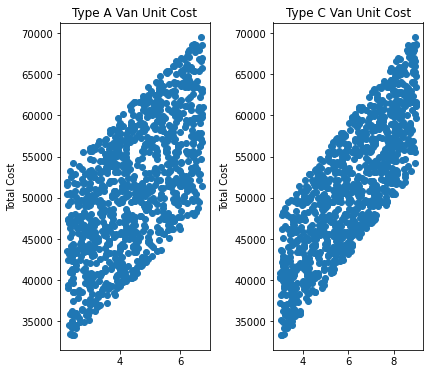

In [12]:
figsize(12, 10)
plt.subplot(241)
plt.scatter(unit_cost_a, y)
plt.title("Type A Van Unit Cost")
plt.ylabel("Total Cost")
plt.subplot(242)
plt.scatter(unit_cost_c, y)
plt.title("Type C Van Unit Cost")
plt.ylabel("Total Cost")
plt.tight_layout()

In [26]:
from SALib.sample import saltelli
from SALib.analyze import sobol
import numpy as np
import math

# Define the model inputs
problem = { 
    'num_vars': 2,
    'names': ['cost_a', 'cost_c'],
    'bounds': [[2.25,6.75],
               [3,9]]
}

In [27]:
param_values = saltelli.sample(problem, 1000)

D:\Anacoda\lib\site-packages\SALib\sample\saltelli.py:52: FutureWarning: 
        Convergence properties of the Sobol' sequence is only valid if `N` = 2^n.
        SALib will continue on, but results may have issues.
        In future, this will raise an error.
        
  warnings.warn(msg, FutureWarning)


In [12]:
def cost(X,hubs_d,a,D,d):
    r = []
    for x in X:
        ac = 0
        for i in hubs_d:
            c = max(70, 70+x[0]*(g[i]-5)) * math.ceil(hubs_d[i]/800)
            ac += c
        ac = round(ac, 2)
        cc = 0
        for i in hubs:
            hub_cost = 0
            node = list(a[a[i]>0][i].index)
            node.remove(i)
            for j in node:
                c = D.loc[i][j] * x[1] * math.ceil(d[j] / 40)
                hub_cost += c
            cc += hub_cost
        cc = round(cc, 2)
        r.append(20 * 152 + cc + ac)
    return np.array(r)

In [34]:
Y = cost(param_values,hubs_d,a,D,d)

In [35]:
print(param_values.shape, Y.shape)
# Perform analysis 
Si = sobol.analyze(problem, Y, print_to_console=True)
print()

(6000, 2) (6000,)
Parameter S1 S1_conf ST ST_conf
cost_a 0.366435 0.047579 0.369344 0.031990
cost_c 0.629144 0.067022 0.631126 0.052074

Parameter_1 Parameter_2 S2 S2_conf
cost_a cost_c 0.005819 0.083411



Variables and sensitivity index

|Name| sensitivity index |S_conf (95%)|Total sensitivity index|ST_conf (95%)|
| :--- | ---:| ---: | ---: |---: |
|cost_a  |  0.366  |0.048 |0.369|0.032
|cost_c  |  0.629  |0.067|0.631|0.052
|cost_a&cost_c  |  0.006  |0.083


### Sensitivity line chart

In [14]:
# van cost fluctuated between ±50%
fluctuation = np.arange(-0.5,0.51,0.05)

In [15]:
# compute type A van cost
def cost_a(k,cost_c,cost_a,hubs_d,a,D,d):
    ac = 0
    for i in hubs_d:
        c = max(70*(1+k), 70+(1+k)*cost_a*(g[i]-5)) * math.ceil(hubs_d[i]/800)
        ac += c
    ac = round(ac, 2)
    cc = 0
    for i in hubs:
        hub_cost = 0
        node = list(a[a[i]>0][i].index)
        node.remove(i)
        for j in node:
            c = D.loc[i][j] * cost_c * math.ceil(d[j] / 40)
            hub_cost += c
        cc += hub_cost
    cc = round(cc, 2)
    return 20 * 152 + cc + ac

output_a = list()
for i in fluctuation:
    temp = cost_a(i,6,4.5,hubs_d,a,D,d)
    output_a.append(temp)

In [16]:
# compute type C van cost
def cost_c(k,cost_c,cost_a,hubs_d,a,D,d):
    ac = 0
    for i in hubs_d:
        c = max(70, 70+cost_a*(g[i]-5)) * math.ceil(hubs_d[i]/800)
        ac += c
    ac = round(ac, 2)
    cc = 0
    for i in hubs:
        hub_cost = 0
        node = list(a[a[i]>0][i].index)
        node.remove(i)
        for j in node:
            c = D.loc[i][j] * (1+k)*cost_c * math.ceil(d[j] / 40)
            hub_cost += c
        cc += hub_cost
    cc = round(cc, 2)
    return 20 * 152 + cc + ac

output_c = list()
for i in fluctuation:
    temp = cost_c(i,6,4.5,hubs_d,a,D,d)
    output_c.append(temp)

In [17]:
# compute type A and C van cost
def cost_ac(k,cost_c,cost_a,hubs_d,a,D,d):
    ac = 0
    for i in hubs_d:
        c = max(70*(1+k), 70+(1+k)*cost_a*(g[i]-5)) * math.ceil(hubs_d[i]/800)
        ac += c
    ac = round(ac, 2)
    cc = 0
    for i in hubs:
        hub_cost = 0
        node = list(a[a[i]>0][i].index)
        node.remove(i)
        for j in node:
            c = D.loc[i][j] * (1+k)*cost_c * math.ceil(d[j] / 40)
            hub_cost += c
        cc += hub_cost
    cc = round(cc, 2)
    return 20 * 152 + cc + ac

output_ac = list()
for i in fluctuation:
    temp = cost_ac(i,6,4.5,hubs_d,a,D,d)
    output_ac.append(temp)

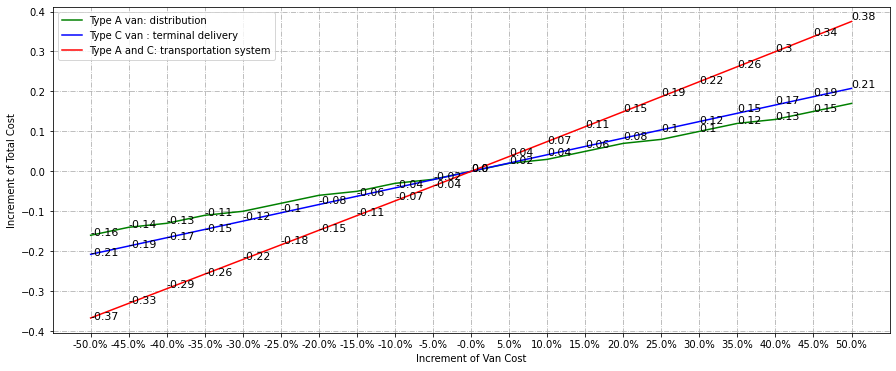

In [20]:
import matplotlib.pyplot as plt

list_fluctuation = []
for i in range(len(fluctuation)):
    list_fluctuation.append(str(round(fluctuation[i]*100,0))+'%')

plt.figure(figsize=(15, 6))
plt.xlabel("Increment of Van Cost")
plt.ylabel("Increment of Total Cost")
plt.plot(list_fluctuation, out_list_a ,c='green',label='Type A van: distribution')
plt.plot(list_fluctuation, np.array(output_c)/51171.85-1, c='blue',label='Type C van : terminal delivery ')
plt.plot(list_fluctuation, np.array(output_ac)/51171.85-1, c='red',label='Type A and C: transportation system')
plt.grid(linestyle = '-.')
plt.legend()


for x,y in zip(list_fluctuation,out_list_c):
    plt.text(x,y, y,fontdict={'fontsize':11})
for x,y in zip(list_fluctuation,out_list_ac):
    plt.text(x,y, y,fontdict={'fontsize':11})
for x,y in zip(list_fluctuation[0:4],out_list_a[0:4]):
    plt.text(x,y, y,fontdict={'fontsize':11})
for x,y in zip(list_fluctuation[-5:-1],out_list_a[-5:-1]):
    plt.text(x,y, y,fontdict={'fontsize':11})

In [19]:
out_list_a = list(np.array(output_a)/51171.85-1)
for i in range(len(out_list_a)):
    out_list_a[i] = round(out_list_a[i],2)
out_list_c = list(np.array(output_c)/51171.85-1)
for i in range(len(out_list_c)):
    out_list_c[i] = round(out_list_c[i],2)
out_list_ac = list(np.array(output_ac)/51171.85-1)
for i in range(len(out_list_ac)):
    out_list_ac[i] = round(out_list_ac[i],2)

In [93]:
out_list_a[-5:-1] 


[0.1, 0.12, 0.13, 0.15]

In [177]:
58808.55/51171.85-1

0.149236347718521

### Demand fluct

In [183]:
# compute demand cost
def cost_demand(k,cost_c,cost_a,hubs_d,a,D,d):
    ac = 0
    for i in hubs_d:
        c = max(70, 70+cost_a*(g[i]-5)) * math.ceil(hubs_d[i]*(1+k)/800)
        ac += c
    ac = round(ac, 2)
    cc = 0
    for i in hubs:
        hub_cost = 0
        node = list(a[a[i]>0][i].index)
        node.remove(i)
        for j in node:
            c = D.loc[i][j] * cost_c * math.ceil(d[j]*(1+k) / 40)
            hub_cost += c
        cc += hub_cost
    cc = round(cc, 2)
    tc = 20 * 152 + cc + ac
    return tc

output_tc = list()
for i in fluctuation:
    temp_tc = cost_a(i,6,4.5,hubs_d,a,D,d)
    output_tc.append(temp_tc)

In [184]:
# compute demand cost
def cost_demand(k,cost_c,cost_a,hubs_d,a,D,d):
    ac = 0
    for i in hubs_d:
        c = max(70, 70+cost_a*(g[i]-5)) * math.ceil(hubs_d[i]*(1+k)/800)
        ac += c
    ac = round(ac, 2)
    cc = 0
    for i in hubs:
        hub_cost = 0
        node = list(a[a[i]>0][i].index)
        node.remove(i)
        for j in node:
            c = D.loc[i][j] * cost_c * math.ceil(d[j]*(1+k) / 40)
            hub_cost += c
        cc += hub_cost
    cc = round(cc, 2)
    tc = 20 * 152 + cc + ac
    return cc

output_cc = list()
for i in fluctuation:
    temp_cc = cost_a(i,6,4.5,hubs_d,a,D,d)
    output_cc.append(temp_cc)

In [185]:
# compute demand cost
def cost_demand(k,cost_c,cost_a,hubs_d,a,D,d):
    ac = 0
    for i in hubs_d:
        c = max(70, 70+cost_a*(g[i]-5)) * math.ceil(hubs_d[i]*(1+k)/800)
        ac += c
    ac = round(ac, 2)
    cc = 0
    for i in hubs:
        hub_cost = 0
        node = list(a[a[i]>0][i].index)
        node.remove(i)
        for j in node:
            c = D.loc[i][j] * cost_c * math.ceil(d[j]*(1+k) / 40)
            hub_cost += c
        cc += hub_cost
    cc = round(cc, 2)
    tc = 20 * 152 + cc + ac
    return ac

output_ac = list()
for i in fluctuation:
    temp_ac = cost_a(i,6,4.5,hubs_d,a,D,d)
    output_ac.append(temp_ac)

In [53]:
yishu = pd.read_csv(r"D:\softwares\微信\files\WeChat Files\zuochanghang\FileStorage\File\2021-06\demand_change_and_original_model.csv")
yishu

,demand_change,acost,ccost,fcost,total_cost,unit_cost
0,-0.200,26880.43,18186.91,3040,48107.34,0.5484
1,-0.100,26880.43,19835.43,3040,49755.86,0.5041
2,-0.075,26880.43,20237.99,3040,50158.42,0.4945
3,-0.050,26880.43,20529.97,3040,50450.40,0.4843
4,-0.025,26880.43,20859.63,3040,50780.06,0.4749
5,0.000,26880.43,21251.42,3040,51171.85,0.4666
6,0.025,39920.36,21579.95,3040,64540.31,0.5742
7,0.050,42462.80,22006.90,3040,67509.70,0.5863
8,0.075,44693.66,22444.27,3040,70177.93,0.5953
9,0.100,45637.08,22768.94,3040,71446.02,0.5923


In [54]:
demand_scale = yishu['demand_change']*100
demand_scale = demand_scale.tolist()
for i in range(len(demand_scale)):
    demand_scale[i] = str(demand_scale[i])+'%'
demand_scale

['-20.0%',
 '-10.0%',
 '-7.5%',
 '-5.0%',
 '-2.5%',
 '0.0%',
 '2.5%',
 '5.0%',
 '7.5%',
 '10.0%',
 '20.0%',
 '100.0%']

In [65]:
total_cost = yishu['total_cost'].copy()
total_cost[5] = 51144
total_cost

0     48107.34
1     49755.86
2     50158.42
3     50450.40
4     50780.06
5     51144.00
6     64540.31
7     67509.70
8     70177.93
9     71446.02
10    75700.32
11    92486.92
Name: total_cost, dtype: float64

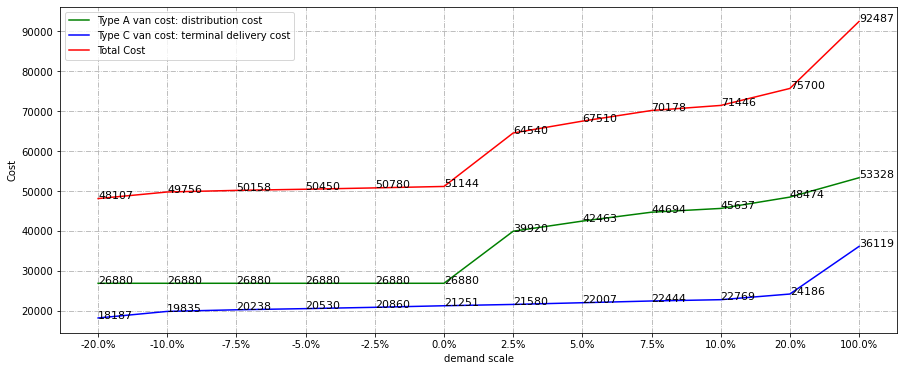

In [66]:
plt.figure(figsize=(15, 6))
plt.xlabel("demand scale")
plt.ylabel("Cost")
plt.plot(demand_scale, yishu['acost'] ,c='green',label='Type A van cost: distribution cost')
plt.plot(demand_scale, yishu['ccost'], c='blue',label='Type C van cost: terminal delivery cost')
plt.plot(demand_scale, total_cost, c='red',label='Total Cost')
plt.grid(linestyle = '-.')
plt.legend()
for x,y in zip(demand_scale,yishu['acost']):
    plt.text(x,y,'%.0f' % y,fontdict={'fontsize':11})
for x,y in zip(demand_scale,yishu['ccost']):
    plt.text(x,y,'%.0f' % y,fontdict={'fontsize':11})
for x,y in zip(demand_scale,yishu['total_cost']):
    plt.text(x,y,'%.0f' % y,fontdict={'fontsize':11})